In [2]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [3]:
# Install libraries if not installed
!pip install tensorflow opencv-python scikit-learn

In [5]:
import os
from collections import Counter

dataset_path = '/content/drive/MyDrive/pharyngitis_dataset'
classes = ['Normal', 'Moderate', 'Tonsillitis']

# Count the number of images in each class
class_counts = {cls: len(os.listdir(os.path.join(dataset_path, cls))) for cls in classes}
print("Class distribution:", class_counts)


Class distribution: {'Normal': 108, 'Moderate': 215, 'Tonsillitis': 147}


In [6]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Set augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

def augment_images(input_path, output_path, target_count):
    images = os.listdir(input_path)
    current_count = len(images)
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    for img_name in images:
        img_path = os.path.join(input_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (150, 150))  # Resize all images to the same size

        img = np.expand_dims(img, 0)  # Add batch dimension

        i = 0
        for batch in datagen.flow(img, batch_size=1, save_to_dir=output_path,
                                  save_prefix="aug", save_format="jpg"):
            i += 1
            current_count += 1
            if current_count >= target_count:
                break

# Balance all classes to the maximum class count
max_class_count = max(class_counts.values())

for cls in classes:
    input_dir = os.path.join(dataset_path, cls)
    output_dir = os.path.join('/content/drive/MyDrive/pharyngitis_balanced', cls)
    augment_images(input_dir, output_dir, max_class_count)

print("Dataset balancing completed.")


Dataset balancing completed.


In [7]:
balanced_dataset_path = '/content/drive/MyDrive/pharyngitis_balanced'

# Count the balanced dataset images
balanced_class_counts = {cls: len(os.listdir(os.path.join(balanced_dataset_path, cls))) for cls in classes}
print("Balanced class distribution:", balanced_class_counts)


Balanced class distribution: {'Normal': 213, 'Moderate': 212, 'Tonsillitis': 211}


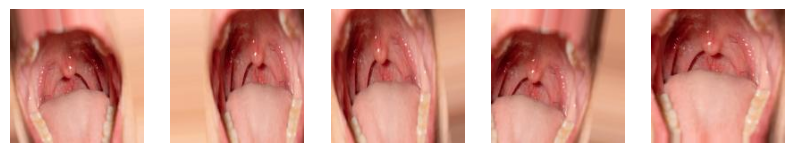

In [8]:
import matplotlib.pyplot as plt

# Visualize augmented images
sample_class = 'Normal'  # Change to any class
sample_dir = os.path.join(balanced_dataset_path, sample_class)
sample_images = os.listdir(sample_dir)[:5]

plt.figure(figsize=(10, 5))
for i, img_name in enumerate(sample_images):
    img_path = os.path.join(sample_dir, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
plt.show()


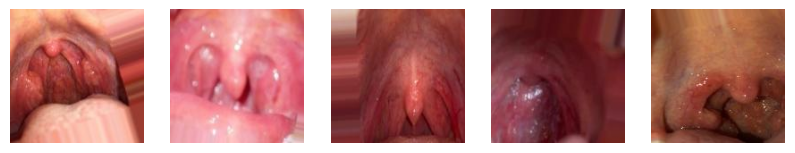

In [9]:
import matplotlib.pyplot as plt

# Visualize augmented images
sample_class = 'Moderate'  # Change to any class
sample_dir = os.path.join(balanced_dataset_path, sample_class)
sample_images = os.listdir(sample_dir)[:5]

plt.figure(figsize=(10, 5))
for i, img_name in enumerate(sample_images):
    img_path = os.path.join(sample_dir, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
plt.show()


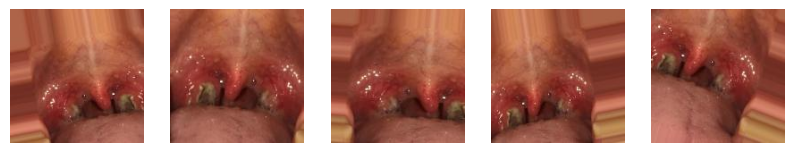

In [10]:
import matplotlib.pyplot as plt

# Visualize augmented images
sample_class = 'Tonsillitis'  # Change to any class
sample_dir = os.path.join(balanced_dataset_path, sample_class)
sample_images = os.listdir(sample_dir)[:5]

plt.figure(figsize=(10, 5))
for i, img_name in enumerate(sample_images):
    img_path = os.path.join(sample_dir, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
plt.show()
